In [22]:
# preparing dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [23]:
#Vectorizing the data to feed it to the multi class neural network
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)

In [24]:
# Vectorizing the data labels 

''' first way 
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels) '''

#second way by using built-in way with keras
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [25]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [26]:
#Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
#Training the model with 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.6797 - accuracy: 0.5227 - val_loss: 1.7651 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4348 - accuracy: 0.7087 - val_loss: 1.2991 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0479 - accuracy: 0.7754 - val_loss: 1.1304 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8208 - accuracy: 0.8309 - val_loss: 1.0292 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6483 - accuracy: 0.8672 - val_loss: 0.9613 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5190 - accuracy: 0.8938 - val_loss: 0.9184 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4212 - accuracy: 0.9148 - val_loss: 0.9469 - val_accuracy: 0.8030
Epoch 8/20
16

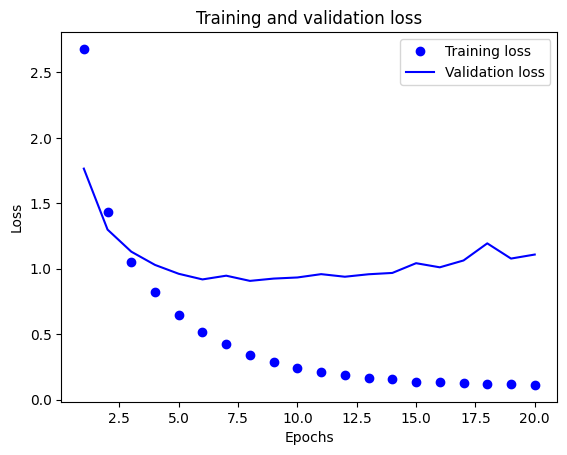

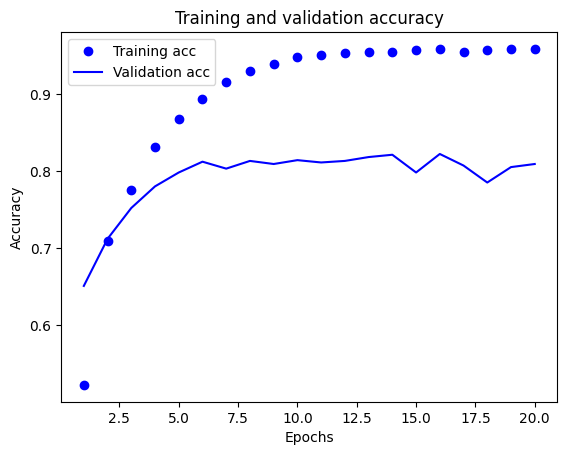

In [30]:
#Plotting the graphs of training vs validation loss and training vs accuracy

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
#Retarining the model with 9 epochs, as it starts overfitting after 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.5946 - accuracy: 0.5193 - val_loss: 1.7124 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4035 - accuracy: 0.7050 - val_loss: 1.2966 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 0s 21ms/step - loss: 1.0392 - accuracy: 0.7729 - val_loss: 1.1194 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 19ms/step - loss: 0.8243 - accuracy: 0.8240 - val_loss: 1.0344 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6636 - accuracy: 0.8606 - val_loss: 0.9809 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5355 - accuracy: 0.8855 - val_loss: 0.9247 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4375 - accuracy: 0.9100 - val_loss: 0.9226 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [33]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 887us/step - loss: 0.9838 - accuracy: 0.7845
[0.9838109612464905, 0.7845057845115662]


In [34]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 817us/step
